In [1]:
import os
from tensorflow import keras # neural network
import cv2  # computer vision
import numpy as np  # numpy arrays
import matplotlib.pyplot as plt  # visualisation

## Preparing dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = keras.utils.normalize(train_images)
test_images = keras.utils.normalize(test_images)

## Building model

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

c:\Users\gerle\OneDrive\Desktop\number-recognition\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training model

In [4]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.8334 - loss: 0.5808 - val_accuracy: 0.9467 - val_loss: 0.1754
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.9474 - loss: 0.1792 - val_accuracy: 0.9634 - val_loss: 0.1249
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 887us/step - accuracy: 0.9602 - loss: 0.1306 - val_accuracy: 0.9695 - val_loss: 0.1032
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 883us/step - accuracy: 0.9699 - loss: 0.0999 - val_accuracy: 0.9727 - val_loss: 0.0924
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 919us/step - accuracy: 0.9728 - loss: 0.0859 - val_accuracy: 0.9740 - val_loss: 0.0874
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.9775 - loss: 0.0727 - val_accuracy: 0.9767 - val_loss: 0.0777
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9799 - loss: 0.0651 - val_accuracy: 0.9755 - val_loss: 0.0802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9812 -

In [5]:
model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.9733 - loss: 0.0883


[0.0758894681930542, 0.9778000116348267]

In [6]:
model.save('digits.keras')

## Loading model

In [7]:
model = keras.models.load_model('digits.keras')

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.9733 - loss: 0.0883


[0.0758894681930542, 0.9778000116348267]

## Processing images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
This digit is probably a(n) 4!


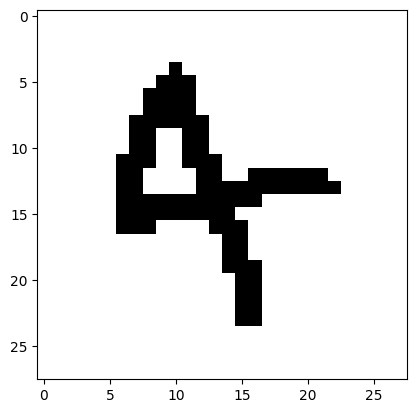

In [21]:
if os.path.isfile("number.png"):
    img = cv2.imread("number.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.invert(np.array([img]))

    prediction = model.predict(img)
    print(f"This digit is probably a(n) {np.argmax(prediction)}!")

    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()